<a href="https://colab.research.google.com/github/lups0208/datasciencecoursera/blob/master/5_Linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis PML por GCR

Tengo los archivos que utilizaremos en mi github. Los cuales se obtuvieron al final del cuaderno 4 (cong & pml) y cuaderno 2 (gcr)

In [ ]:
cong_path = 'https://github.com/IvanMGro/CENACE/raw/main/congzona.xlsx'
pml_path =  'https://github.com/IvanMGro/CENACE/raw/main/pmlzona.xlsx'
gcr_path =  'https://github.com/IvanMGro/CENACE/raw/main/zona_gcr.xlsx'

Las gráficas del ejercicio anterior, no es una buena forma de visualizar y analizar el mercado. Lo más común es segmentar y comparar precios por regiones (GCR), 

In [ ]:
import pandas as pd

cong = pd.read_excel(cong_path)
pml = pd.read_excel(pml_path)
zona_gcr = pd.read_excel(gcr_path)

In [ ]:
pml

,Fecha,Zona,PML
0,2020-01-01,ACAPULCO,436.570833
1,2020-01-01,AGUASCALIENTES,314.476667
2,2020-01-01,APATZINGAN,341.145000
3,2020-01-01,CABORCA,203.472917
4,2020-01-01,CAMARGO,273.548750
...,...,...,...
36961,2020-12-31,ZACAPU,449.835833
36962,2020-12-31,ZACATECAS,434.239167
36963,2020-12-31,ZAMORA,449.855833
36964,2020-12-31,ZAPOTLAN,440.121250


Con la función ```merge()```puedo combinar mi dataframe con pmls y congestion. Para que esta función no me de error, debo procurar que ambos dataframes que estoy por combinar, tengan una columna en común, en este caso es la columna zona de carga

In [ ]:
zona_gcr.rename(columns={'ZONA DE CARGA':'Zona', 'CENTRO DE CONTROL REGIONAL':'GCR'},inplace=True)
zona_gcr

,Zona,GCR
0,ENSENADA,BAJA CALIFORNIA
1,MEXICALI,BAJA CALIFORNIA
2,SANLUIS,BAJA CALIFORNIA
3,TIJUANA,BAJA CALIFORNIA
4,No Aplica,No Aplica
...,...,...
106,CHETUMAL,PENINSULAR
107,MERIDA,PENINSULAR
108,MOTUL TIZIMIN,PENINSULAR
109,RIVIERA MAYA,PENINSULAR


In [ ]:
pml_gcr = pd.merge(zona_gcr,pml)
pml_gcr

,Zona,GCR,Fecha,PML
0,CENTRO ORIENTE,CENTRAL,2020-01-01,343.659583
1,CENTRO ORIENTE,CENTRAL,2020-01-02,494.065417
2,CENTRO ORIENTE,CENTRAL,2020-01-03,553.409167
3,CENTRO ORIENTE,CENTRAL,2020-01-04,437.542083
4,CENTRO ORIENTE,CENTRAL,2020-01-05,326.520000
...,...,...,...,...
37693,TICUL,PENINSULAR,2020-12-27,497.810417
37694,TICUL,PENINSULAR,2020-12-28,546.875833
37695,TICUL,PENINSULAR,2020-12-29,479.599583
37696,TICUL,PENINSULAR,2020-12-30,529.461250


In [ ]:
pml_gcr.dtypes

Zona             object
GCR              object
Fecha    datetime64[ns]
PML             float64
dtype: object

Voy añadir una nueva columna en mi dataframe donde solo tendré mes y año

In [ ]:
pml_gcr['Mes'] = pml_gcr['Fecha'].dt.strftime('%Y-%m')
pml_gcr

,Zona,GCR,Fecha,PML,Mes
0,CENTRO ORIENTE,CENTRAL,2020-01-01,343.659583,2020-01
1,CENTRO ORIENTE,CENTRAL,2020-01-02,494.065417,2020-01
2,CENTRO ORIENTE,CENTRAL,2020-01-03,553.409167,2020-01
3,CENTRO ORIENTE,CENTRAL,2020-01-04,437.542083,2020-01
4,CENTRO ORIENTE,CENTRAL,2020-01-05,326.520000,2020-01
...,...,...,...,...,...
37693,TICUL,PENINSULAR,2020-12-27,497.810417,2020-12
37694,TICUL,PENINSULAR,2020-12-28,546.875833,2020-12
37695,TICUL,PENINSULAR,2020-12-29,479.599583,2020-12
37696,TICUL,PENINSULAR,2020-12-30,529.461250,2020-12


Hacemos el promedio mensual por GCR. Al aplicar la función ```.groupby()``` obtenemos un tipo de estructura de dato llamado 'data series' . Usamos la función ```reset_index()``` para regresarlo como al formato de 'dataframe'

In [ ]:
gcr_mes = pml_gcr.groupby(['Mes','GCR'])['PML'].mean().reset_index()
gcr_mes

,Mes,GCR,PML
0,2020-01,CENTRAL,522.566924
1,2020-01,NORESTE,379.815486
2,2020-01,NOROESTE,247.135316
3,2020-01,NORTE,315.564259
4,2020-01,OCCIDENTAL,492.002361
...,...,...,...
79,2020-12,NOROESTE,438.486086
80,2020-12,NORTE,469.019024
81,2020-12,OCCIDENTAL,598.564471
82,2020-12,ORIENTAL,624.374556


In [ ]:
import plotly.express as px
fig = px.line(gcr_mes,x='Mes',y='PML',color='GCR')
fig.show()

Con la función ```.pivot``` obtenemos una tabla donde cada fila representa un GCR, cada columna un mes y los valores de la tabla son los PML

In [ ]:
gcr_pivot = gcr_mes.pivot(index='GCR',columns='Mes',values='PML')
gcr_pivot

Mes,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
GCR,,,,,,,,,,,,
CENTRAL,522.566924,584.024133,631.455950,572.229137,595.880414,642.252917,624.077478,757.397074,673.111833,737.680894,900.787488,616.194693
NORESTE,379.815486,353.545686,411.857106,409.732757,455.238346,471.862124,530.110284,637.738426,514.205719,561.807651,670.689804,481.472236
NOROESTE,247.135316,202.556352,206.912835,204.890194,460.437289,500.857633,520.064683,638.680551,539.981078,451.223665,608.470944,438.486086
NORTE,315.564259,265.066275,307.339560,311.449801,469.248627,497.807484,531.608243,640.017740,487.820457,448.168412,606.604554,469.019024
OCCIDENTAL,492.002361,545.185046,580.970206,502.935015,544.076535,583.350650,590.375556,699.367096,600.286922,690.521717,870.885260,598.564471
ORIENTAL,542.040867,637.627829,732.981002,650.487034,648.946958,682.057924,665.771885,814.230034,759.605820,786.354130,926.907799,624.374556
PENINSULAR,648.386591,904.963191,951.471685,900.560483,947.632389,795.025781,929.665875,1029.696302,1010.130653,839.874316,950.046101,627.680081


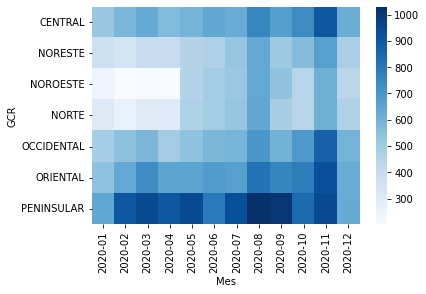

In [ ]:
import seaborn as sns
sns.heatmap(gcr_pivot, cmap='Blues')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02d39aefd0>,
      dtype=object)

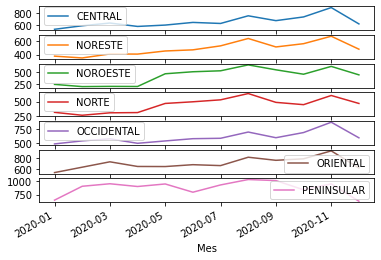

In [ ]:
gcr_pivot = gcr_mes.pivot(index='Mes',columns='GCR',values='PML')
gcr_pivot.plot.line(subplots=True)

# Regresión Lineal

Una regresión lineal busca hallar aquella recta que mejor se ajuste a una serie de puntos (x,y). Es decir, buscamos aquella recta $ y = mx + b$ con coeficientes $m$ y $b$ que mejor se ajuste a nuestros datos. Realizaremos un analisis sobre la relación entre el PML y la congestión. Obtendremos el promedio anual del PML por cada zona de carga. 

In [ ]:
PML_zone = pml.groupby(['Zona'])['PML'].mean().reset_index()
PML_zone

,Zona,PML
0,ACAPULCO,703.001416
1,AGUASCALIENTES,592.532645
2,APATZINGAN,646.356422
3,CABORCA,367.318539
4,CAMARGO,507.655175
...,...,...
96,ZACAPU,620.227473
97,ZACATECAS,599.569388
98,ZAMORA,621.130785
99,ZAPOTLAN,609.604478


Obtenemos el promedio anual de la congestión por cada zona de carga

In [ ]:
cong_zone = cong.groupby(['Zona'])['comp_cong'].mean().reset_index()
cong_zone

,Zona,comp_cong
0,ACAPULCO,53.630762
1,AGUASCALIENTES,7.752893
2,APATZINGAN,16.628782
3,CABORCA,-116.903380
4,CAMARGO,-31.762361
...,...,...
96,ZACAPU,15.328314
97,ZACATECAS,3.532711
98,ZAMORA,15.334239
99,ZAPOTLAN,16.120402


Combinamos los dos dataframes en uno solo

In [ ]:
data_linreg = pd.merge(cong_zone,PML_zone)
data_linreg

,Zona,comp_cong,PML
0,ACAPULCO,53.630762,703.001416
1,AGUASCALIENTES,7.752893,592.532645
2,APATZINGAN,16.628782,646.356422
3,CABORCA,-116.903380,367.318539
4,CAMARGO,-31.762361,507.655175
...,...,...,...
96,ZACAPU,15.328314,620.227473
97,ZACATECAS,3.532711,599.569388
98,ZAMORA,15.334239,621.130785
99,ZAPOTLAN,16.120402,609.604478


Podemos crear una gráfica de la regresión lineal de manera rápida con la paquetería seaborn mediante ```sns.lmplot()```, pero no podemos acceder a los valores de los coeficientes ```m``` y ```b```

In [ ]:
import seaborn as sns

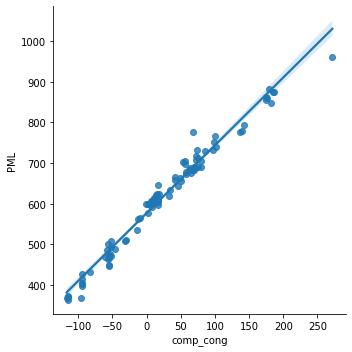

In [ ]:
sns.lmplot(data=data_linreg,x='comp_cong',y='PML')

In [ ]:
from sklearn.linear_model import LinearRegression

con la función reshape, el -1 dice que nuestra matriz tiene un número de ```n``` filas, y el 1 indica que es de 1 columna

In [ ]:
nCong = cong_zone['comp_cong'].values.reshape(-1,1)
type(nCong)
nPML = PML_zone['PML'].values.reshape(-1,1)
type(nPML)

numpy.ndarray

In [ ]:
mi_regresion = LinearRegression()

In [ ]:
mi_regresion.fit(nCong,nPML)

LinearRegression()

In [ ]:
PML_pred = mi_regresion.predict(nCong)
PML_pred

In [ ]:
#obtenemos la ec. de la recta (y = mx + b)
m = mi_regresion.coef_[0][0]
b = mi_regresion.intercept_[0]
print('La pendiente es:', m )
print('El intercepto es:', b )

linreg_label = r'$PML = %0.4f*cong %+0.4f$'%(m,b)

La pendiente es: 1.6686949453691853
El intercepto es: 576.8302525700153


Graficamos con matplotlib

In [ ]:
import matplotlib.pyplot as plt

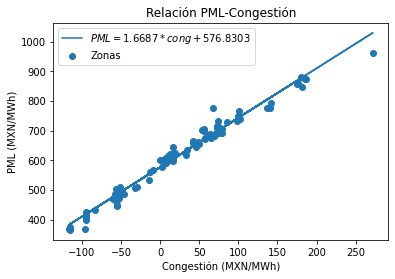

In [ ]:
plt.scatter(cong_zone['comp_cong'],PML_zone['PML'],label='Zonas')
plt.plot(nCong, PML_pred, label= linreg_label)
plt.ylabel('PML (MXN/MWh)')
plt.xlabel('Congestión (MXN/MWh)')
plt.title('Relación PML-Congestión')
plt.legend()

Estadísticas de una regresión lineal. Observamos que arrojan los mismos resultados haciendo uso de la librería de estadística ```statsmodel```

*   Regresión Scikitlearn: m=1.6687 b=576.8303
*   Regresión Statsmodel : m=1.6687 b=576.8303 (columna ```coef```)




In [ ]:
import statsmodels.api as sm
model = sm.OLS(nPML,sm.add_constant(nCong))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4100.
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.23e-82
Time:                        17:05:45   Log-Likelihood:                -447.15
No. Observations:                 101   AIC:                             898.3
Df Residuals:                      99   BIC:                             903.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.8303      2.133    270.406      0.0